In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("/content/drive/MyDrive/WomenClothing/Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [37]:
df.dropna(inplace = True)

In [44]:
df.drop(columns = ["Unnamed: 0", "Clothing ID"], inplace = True)
df.reset_index(inplace=True)

In [45]:
df.drop("index", inplace = True, axis = 1)

In [47]:
# df.Rating.value_counts()

In [41]:
df.loc[df["Rating"] > 3, "target"] = 1
df.loc[df["Rating"] <= 3, "target" ] = 0
df.target = df["target"].astype(int)

In [42]:
df.drop("Rating", axis = 1, inplace = True)

In [48]:
df

,Age,Title,Review Text,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,target
0,60,Some major design flaws,I had such high hopes for this dress and reall...,0,0,General,Dresses,Dresses,0
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,0,General Petite,Bottoms,Pants,1
2,47,Flattering shirt,This shirt is very flattering to all due to th...,1,6,General,Tops,Blouses,1
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",0,4,General,Dresses,Dresses,0
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,1,General Petite,Tops,Knits,1
...,...,...,...,...,...,...,...,...,...
19657,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,1,0,General Petite,Dresses,Dresses,1
19658,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",1,0,General Petite,Tops,Knits,0
19659,31,"Cute, but see through","This fit well, but the top was very see throug...",0,1,General Petite,Dresses,Dresses,0
19660,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,1,2,General,Dresses,Dresses,0


In [63]:
classNames = df["Class Name"].value_counts()[:5].index
df = df.loc[df["Class Name"].isin(classNames)]

<Axes: xlabel='Division Name', ylabel='count'>

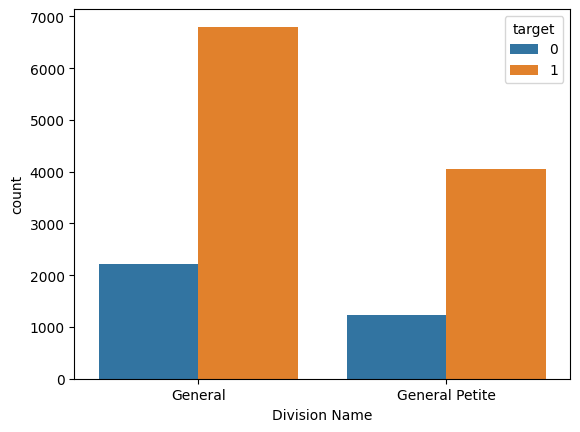

In [71]:
sns.countplot(df, x = "Division Name", hue="target")

<Axes: xlabel='Department Name', ylabel='count'>

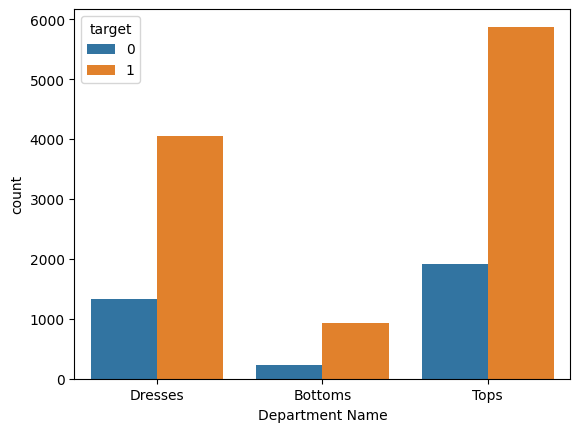

In [77]:
sns.countplot(df , x = "Department Name", hue = "target")

<Axes: xlabel='Class Name', ylabel='count'>

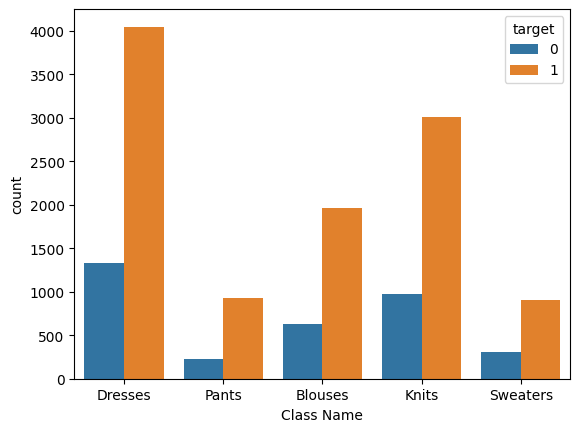

In [78]:
sns.countplot(df , x = "Class Name", hue = "target")

<Axes: xlabel='Age', ylabel='target'>

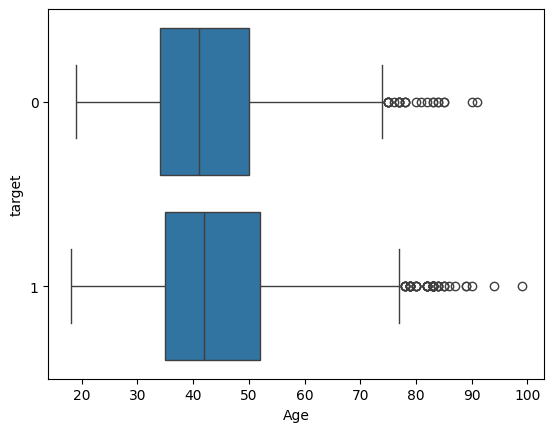

In [79]:
sns.boxplot(df, x = "Age", y = "target")

<Axes: xlabel='target', ylabel='Recommended IND'>

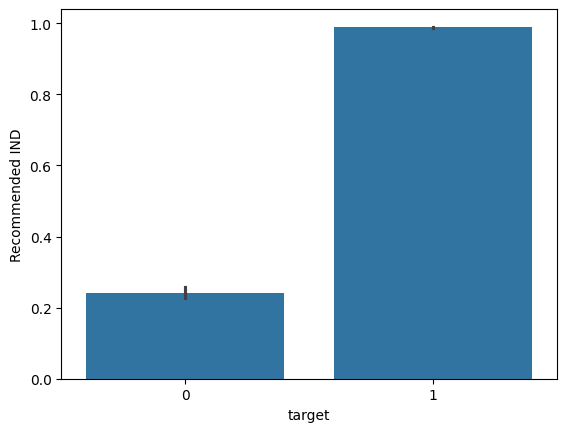

In [82]:
sns.barplot(df, y = "Recommended IND", x = "target")

<Axes: xlabel='target', ylabel='Positive Feedback Count'>

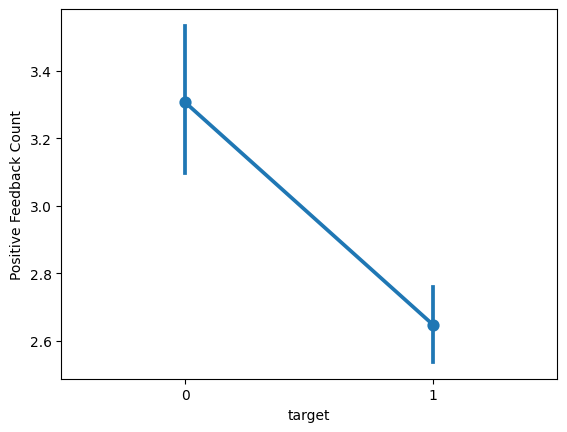

In [86]:
sns.pointplot(df, y = "Positive Feedback Count", x = "target")

<ipython-input-97-0014c3aee4a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["target"].astype(int)
<ipython-input-97-0014c3aee4a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

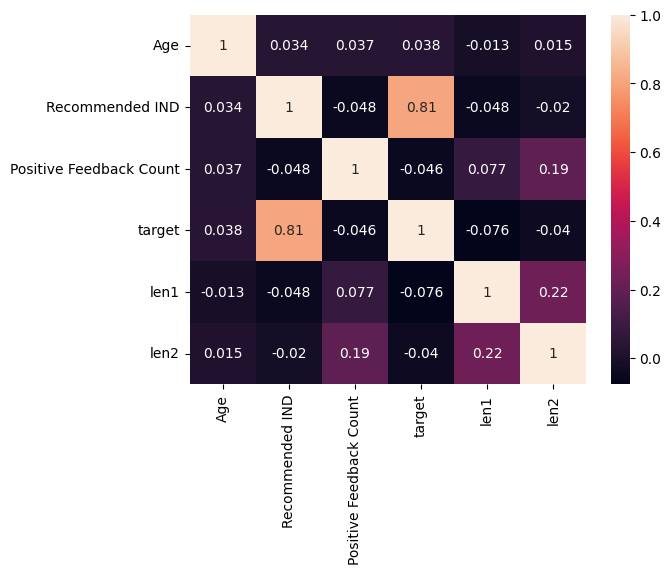

In [97]:
df["target"] = df["target"].astype(int)
sns.heatmap(df.corr(), annot = True)

In [92]:
df["len1"] = df["Title"].apply(len)
df["len2"] = df['Review Text'].apply(len)
df

<ipython-input-92-24d4f3c4fca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len1"] = df["Title"].apply(len)
<ipython-input-92-24d4f3c4fca9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len2"] = df['Review Text'].apply(len)


,Age,Title,Review Text,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,target,len1,len2
0,60,Some major design flaws,I had such high hopes for this dress and reall...,0,0,General,Dresses,Dresses,0,23,500
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,0,General Petite,Bottoms,Pants,1,16,124
2,47,Flattering shirt,This shirt is very flattering to all due to th...,1,6,General,Tops,Blouses,1,16,192
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",0,4,General,Dresses,Dresses,0,23,488
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,1,General Petite,Tops,Knits,1,20,496
...,...,...,...,...,...,...,...,...,...,...,...
19657,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,1,0,General Petite,Dresses,Dresses,1,30,131
19658,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",1,0,General Petite,Tops,Knits,0,26,223
19659,31,"Cute, but see through","This fit well, but the top was very see throug...",0,1,General Petite,Dresses,Dresses,0,21,208
19660,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,1,2,General,Dresses,Dresses,0,50,427


<Axes: xlabel='len1', ylabel='Count'>

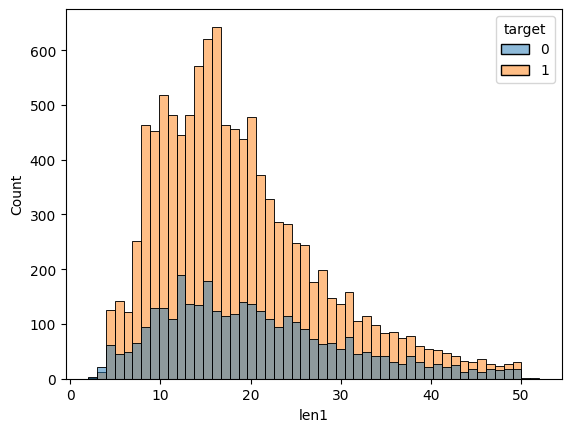

In [93]:
sns.histplot(df, x = "len1", hue = "target")

<Axes: xlabel='len2', ylabel='Count'>

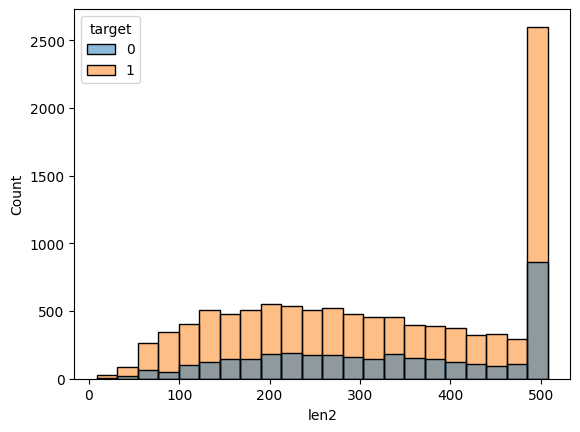

In [94]:
sns.histplot(df, x = "len2", hue = "target")

<ipython-input-95-9dcefd45ae4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["target"].astype("category")


<Axes: xlabel='target', ylabel='len2'>

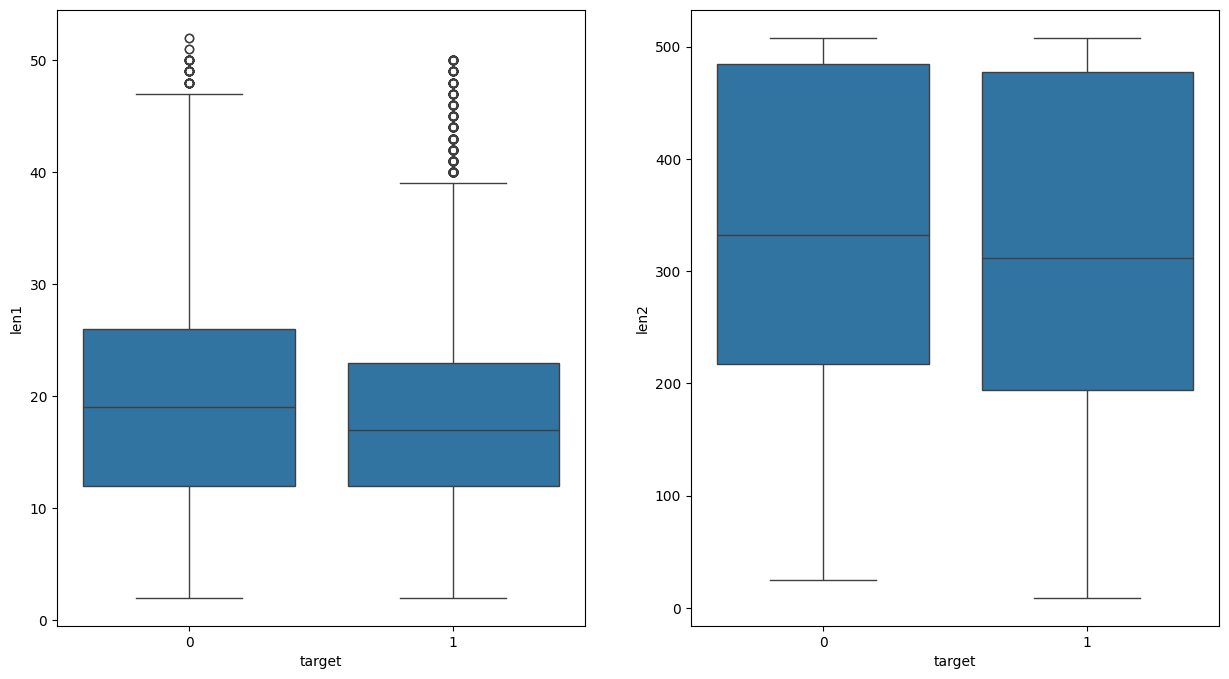

In [95]:
df["target"] = df["target"].astype("category")

fig, axes = plt.subplots(1,2, figsize = (15, 8))

sns.boxplot(df, x = "target", y = "len1", ax = axes[0])
sns.boxplot(df, x=  "target", y = "len2", ax= axes[1])

<Axes: xlabel='target', ylabel='len2'>

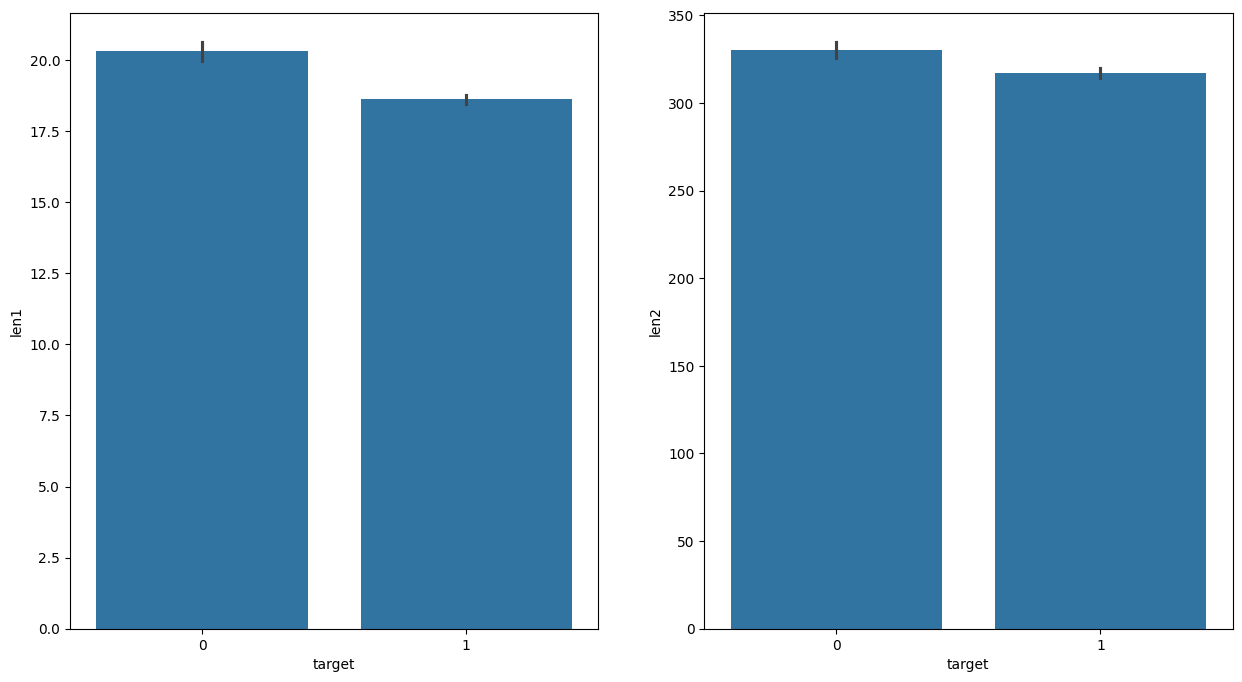

In [96]:

fig, axes = plt.subplots(1,2, figsize = (15, 8))

sns.barplot(df, x = "target", y = "len1", ax = axes[0])
sns.barplot(df, x=  "target", y = "len2", ax= axes[1])

In [104]:
texts1 = df['Title'].values
texts2 = df["Review Text"].values
additional_features = df.drop(columns = ["Title", "Review Text", "target"])
y = df.target

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

one_hot = OneHotEncoder(sparse_output = False)
categories = ["Department Name", "Class Name"]

transformer = ColumnTransformer([
    ("one_hot", one_hot, categories),
    ("ordinal", OrdinalEncoder(), ["Division Name"])
    ],remainder = "passthrough")
transformed_features = transformer.fit_transform(additional_features)

In [122]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Dense, GlobalMaxPool1D, LSTM, Dropout
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [123]:
X_train_text1, X_test_text1, X_train_text2, X_test_text2, int_train, int_test, y_train, y_test = train_test_split(texts1, texts2, transformed_features, y, test_size = 0.2, random_state = 42)

In [156]:
MAX_VOCAB = 20000
tokenizer1 = Tokenizer(num_words = MAX_VOCAB)
tokenizer1.fit_on_texts(X_train_text1)
sequence_train_1 = tokenizer1.texts_to_sequences(X_train_text1)
sequence_test_1 = tokenizer1.texts_to_sequences(X_test_text1)
idx1 = tokenizer1.word_index
V1 = len(idx1)
data_train1 = pad_sequences(sequence_train_1)
T1 = data_train1.shape[1]
data_test1 = pad_sequences(sequence_test_1, maxlen = T1)


tokenizer2 = Tokenizer(num_words = MAX_VOCAB)
tokenizer2.fit_on_texts(X_train_text2)
sequence_train_2 = tokenizer2.texts_to_sequences(X_train_text2)
sequence_test_2 = tokenizer2.texts_to_sequences(X_test_text2)
idx2 = tokenizer2.word_index
V2 = len(idx2)
data_train2 = pad_sequences(sequence_train_2)
T2 = data_train2.shape[1]
data_test2 = pad_sequences(sequence_test_2, maxlen = T2)


M1 = 15
D1 = 15

i1 = Input(shape = (T1,))
x1 = Embedding(V1 + 1, D1)(i1)
x1 = LSTM(M1, return_sequences = True)(x1)
x1 = GlobalMaxPool1D()(x1)


i2 = Input(shape = (T2,))
x2 = Embedding(V2 + 1, D1)(i2)
x2 = LSTM(M1, return_sequences = True)(x2)
x2 = GlobalMaxPool1D()(x2)

i3 = Input(shape = (transformed_features.shape[1], ))
x3 = Dense(16)(i3)

concatenated = tf.keras.layers.Concatenate()([x1, x2, x3])
outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(concatenated)

model = tf.keras.models.Model(inputs = [i1,i2,i3], outputs = outputs)
model.compile(optimizer = tf.keras.optimizers.Adam(0.01),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

r = model.fit([data_train1, data_train2, int_train],y_train,  epochs = 5, validation_data = ([data_test1, data_test2, int_test], y_test), batch_size = 64)

Epoch 1/5
179/179 [==============================] - 18s 69ms/step - loss: 1.5785 - accuracy: 0.7889 - precision_5: 0.8368 - recall_5: 0.8978 - val_loss: 0.2801 - val_accuracy: 0.8798 - val_precision_5: 0.8849 - val_recall_5: 0.9644
Epoch 2/5
179/179 [==============================] - 9s 49ms/step - loss: 0.2030 - accuracy: 0.9206 - precision_5: 0.9432 - recall_5: 0.9531 - val_loss: 0.2266 - val_accuracy: 0.9057 - val_precision_5: 0.9121 - val_recall_5: 0.9668
Epoch 3/5
179/179 [==============================] - 10s 58ms/step - loss: 0.1586 - accuracy: 0.9411 - precision_5: 0.9567 - recall_5: 0.9664 - val_loss: 0.5026 - val_accuracy: 0.8166 - val_precision_5: 0.9781 - val_recall_5: 0.7716
Epoch 4/5
179/179 [==============================] - 10s 58ms/step - loss: 0.1184 - accuracy: 0.9555 - precision_5: 0.9671 - recall_5: 0.9748 - val_loss: 0.2460 - val_accuracy: 0.9081 - val_precision_5: 0.9217 - val_recall_5: 0.9584
Epoch 5/5
179/179 [==============================] - 13s 70ms/step - 

In [147]:
model.evaluate([data_test1, data_test2, int_test], y_test)

90/90 [==============================] - 2s 18ms/step - loss: 0.2599 - accuracy: 0.0000e+00 - precision_4: 0.9464 - recall_4: 0.9256


[0.25988131761550903, 0.0, 0.9464114904403687, 0.9255966544151306]

In [149]:
y_preds = model.predict([data_test1, data_test2, int_test])
y_preds

90/90 [==============================] - 3s 17ms/step


array([[0.01397264],
       [0.932422  ],
       [0.99949175],
       ...,
       [0.994519  ],
       [0.31958196],
       [0.40860197]], dtype=float32)

In [151]:
y_preds = [1 if i > 0.5 else 0 for i in y_preds]

In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       726
           1       0.95      0.93      0.94      2137

    accuracy                           0.91      2863
   macro avg       0.87      0.89      0.88      2863
weighted avg       0.91      0.91      0.91      2863

